# The Sparks Foundation
 Internship

## Prachi Shah
Data Science and Business Analytics

## Task 1 : Prediction Using Supervised ML

In [32]:
#importing all libraries that are required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
%matplotlib inline

In [33]:
#reading data from remote link
url ="http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully!")

s_data.head(10)

Data imported successfully!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### Checking if there are any NULL values

In [34]:
s_data.isnull == True

False

##### There are no NULL values in the Dataset so, plot the data points on 2-D graph and see if we can find any relationship between the data.
##### Visualising the data:


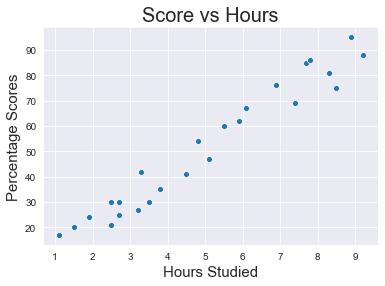

In [35]:
sns.set_style('darkgrid')
sns.scatterplot(y = s_data['Scores'], x = s_data['Hours'])
plt.title('Score vs Hours', size = 20)
plt.xlabel('Hours Studied', size=15)
plt.ylabel('Percentage Scores', size=15)
plt.show()

##### There's a positive linear relation between Hours studied and Percentage of marks

##### Plotting Regression line:

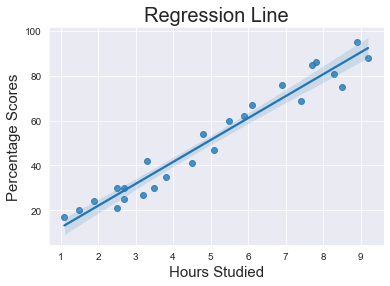

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [36]:
sns.regplot(x = s_data['Hours'], y = s_data['Scores'])
plt.title('Regression Line', size = 20)
plt.xlabel('Hours Studied', size=15)
plt.ylabel('Percentage Scores', size=15)
plt.show()
print(s_data.corr())

### Training the data

##### Preparing the data
Defining x and y by dividing the data into attributes and labels

In [37]:
X = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values

##### Splitting the Data

In [38]:
#splitting our data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

### Training the Algorithm

In [39]:
regression = LinearRegression()
regression.fit(train_X, train_y)

print("Training Complete.")
print("Model Trained.")

Training Complete.
Model Trained.


### Predicting the Percentage

In [40]:
pred_y = regression.predict(test_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in test_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


### Comparing the Actual and Predicted Marks

In [41]:
df = pd.DataFrame({'Actual': test_y, 'Predicted' : pred_y})
df

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


#### Plotting Actual and Predicted Marks

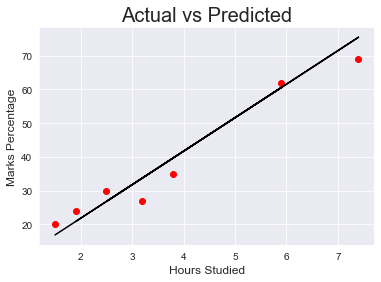

In [42]:
plt.scatter(x=test_X, y=test_y, color='Red')
plt.plot(test_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

### Evaluating the Model

In [43]:
#mean absolute error to evaluate performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(test_y, pred_y))

Mean Absolute Error: 4.130879918502486


### Predicting the score if studied for 9.25 hours/day

In [44]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


### According to linear regression model, predicted score if a student studies for 9.25 hrs/ day is 93.893